## Processed Shots Data Exploration
Notebook to plot the data in the processed shots, located on tigress

### Imports and constants

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
import plasma

In [3]:
indir = '/tigress/wvdp/'
outdir = './Output/Shots/'

### Functions definitions

In [4]:
# Plot shot function, currently only for jet, using 11 0D singals.
def plot_shot(shot, file):
    fig, ax_grid = plt.subplots(nrows=3, ncols=4, figsize=(20,10))
    ax = ax_grid.flatten()
    
    if shot.is_disruptive:
        x_label = "Time to disruption [s]"
        ttd = 10**(file.f.ttd)
        t_min = max(ttd)
        t_max = min(ttd)
        ax[0].plot(ttd)
        ax[0].set_ylabel(x_label)
        ax[0].set_title('Time to disruption')
        ax[0].set_xlabel('Array Index')
        title='Shot {0} ({1}), disruption time: {2:0.1f}ms'.format(shot.number, 
                                                                   shot.machine.name.upper(), 
                                                                   shot.t_disrupt)
    else:
        x_label = "Time [s]"
        ax[0].set_visible(False)
        t_min = 0
        t_max = len(file.f.ttd)/1000
        ttd = np.linspace(t_min, t_max, num=len(file.f.ttd))
        title='Shot {0} ({1}), non-disruptive'.format(shot.number, 
                                                      shot.machine)
        
    signals_dict = file.f.signals_dict.item(0)
    for i,(k,v) in enumerate(signals_dict.items()):
        ax[i+1].plot(ttd,v, '.', markersize=2)
        ax[i+1].set_ylabel(k)
        if(shot.is_disruptive):
            # t_disrupt is in miliseconds!
            ax[i+1].axvline(x=shot.t_disrupt/1000, color='r', alpha=0.3)
        ax[i+1].set_xlabel(x_label)    
        ax[i+1].set_title(k)
        ax[i+1].set_xlim(t_min,t_max)
        
    fig.suptitle(title, fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    if shot.is_disruptive:
        fig.savefig(outdir+'Disruptive/{}{}.pdf'.format(shot.machine, shot.number))
    else: 
        fig.savefig(outdir+'NonDisruptive/{}{}.pdf'.format(shot.machine, shot.number))

### Shotlist

In [5]:
file_name = 'processed_shotlists/jet_data/shot_lists_signal_group_3236450206765786377241194018831785328.npz'
shotlist_file = np.load(indir+file_name, allow_pickle=True)

In [6]:
shotlist_file.files

['shot_list_train', 'shot_list_validate', 'shot_list_test']

In [7]:
shotlist_val = shotlist_file.f.shot_list_validate

all signals (determines which signals are downloaded and preprocessed):
dict_values([q95 safety factor, internal inductance, plasma current, Normalized Beta, stored energy, Locked mode amplitude, Plasma density, Radiated Power Core, Radiated Power Edge, Radiated Power, Input Power (beam for d3d), Input Beam Torque, stored energy time derivative, plasma current direction, plasma current target, plasma current error, Electron temperature profile, Electron density profile])


In [8]:
shot = shotlist_val[0]

In [9]:
pprint(shot.__dict__)

{'augmentation_fn': None,
 'is_disruptive': False,
 'machine': jet,
 'number': 75465,
 'signals': [q95 safety factor,
             internal inductance,
             plasma current,
             stored energy,
             Locked mode amplitude,
             Plasma density,
             Radiated Power Core,
             Radiated Power Edge,
             Radiated Power,
             Input Power (beam for d3d),
             stored energy time derivative],
 'signals_dict': None,
 't_disrupt': -1.0,
 'ttd': None,
 'valid': True,
 'weight': 1.0}


### Machines

In [10]:
jet = shot.signals[0].machines[0]
d3d = shot.signals[0].machines[1]

In [11]:
shot.machine.__dict__

{'name': 'jet',
 'server': 'mdsplus.jet.efda.org',
 'max_cores': 8,
 'fetch_data_fn': <function data.signals.fetch_jet_data(signal_path, shot_num, c)>,
 'current_threshold': 100000.0}

In [12]:
d3d.__dict__

{'name': 'd3d',
 'server': 'atlas.gat.com',
 'max_cores': 32,
 'fetch_data_fn': <function data.signals.fetch_d3d_data(signal_path, shot, c=None)>,
 'current_threshold': 0.2}

### Signals

In [13]:
df_jet_signals = []
df_d3d_signals = []

for sig in shot.signals:
    df = pd.DataFrame(sig.__dict__)
    row_jet = df.query('machines==@jet')
    row_d3d = df.query('machines==@d3d')
    if len(row_jet)==1:
        df_jet_signals.append(row_jet)
    if len(row_d3d)==1:
        df_d3d_signals.append(row_d3d)

In [14]:
df_jet_signals = pd.concat(df_jet_signals, sort=False, ignore_index=True,copy=False)
df_jet_signals

,description,paths,machines,causal_shifts,is_ip,num_channels,normalize,data_avail_tolerances,is_strictly_positive,mapping_paths,channel_nums
0,q95 safety factor,ppf/efit/q95,jet,15,False,1,False,0.03,False,None,NaN
1,internal inductance,jpf/gs/bl-li<s,jet,0,False,1,True,0.00,False,None,NaN
2,plasma current,jpf/da/c2-ipla,jet,0,True,1,True,0.00,False,None,NaN
3,stored energy,jpf/gs/bl-wmhd<s,jet,0,False,1,True,0.00,False,None,NaN
4,Locked mode amplitude,jpf/da/c2-loca,jet,0,False,1,True,0.00,False,None,NaN
5,Plasma density,jpf/df/g1r-lid:003,jet,0,False,1,True,0.00,True,None,NaN
6,Radiated Power Core,ppf/bolo/kb5h,jet,0,False,1,True,0.00,False,None,14.0
7,Radiated Power Edge,ppf/bolo/kb5h,jet,0,False,1,True,0.00,False,None,10.0
8,Radiated Power,jpf/db/b5r-ptot>out,jet,0,False,1,True,0.00,False,None,NaN
9,Input Power (beam for d3d),jpf/gs/bl-ptot<s,jet,0,False,1,True,0.00,False,None,NaN


In [15]:
# WARNING: This list will only be complete if the input processed data contains at least one DII-D shot!
df_d3d_signals = pd.concat(df_d3d_signals, sort=False, ignore_index=True,copy=False)
df_d3d_signals

,description,paths,machines,causal_shifts,is_ip,num_channels,normalize,data_avail_tolerances,is_strictly_positive,mapping_paths,channel_nums
0,q95 safety factor,EFIT01/RESULTS.AEQDSK.Q95,d3d,10,False,1,False,0.02,False,None,NaN
1,internal inductance,d3d/efsli,d3d,0,False,1,True,0.00,False,None,NaN
2,plasma current,d3d/ipspr15V,d3d,0,True,1,True,0.00,False,None,NaN
3,stored energy,d3d/efswmhd,d3d,0,False,1,True,0.00,False,None,NaN
4,Locked mode amplitude,d3d/dusbradial,d3d,0,False,1,True,0.00,False,None,NaN
5,Plasma density,d3d/dssdenest,d3d,0,False,1,True,0.00,True,None,NaN
6,Radiated Power Core,d3d/\bol_l15_p,d3d,0,False,1,True,0.00,False,None,NaN
7,Radiated Power Edge,d3d/\bol_l03_p,d3d,0,False,1,True,0.00,False,None,NaN
8,Input Power (beam for d3d),d3d/bmspinj,d3d,0,False,1,True,0.00,False,None,NaN


### Shots

In [16]:
shots_dir = indir+'processed_shots/signal_group_3236450206765786377241194018831785328/'
#all_files = glob.glob(shots_dir+'*.npz')
#vars(file)

Create a list of n disruptive and n nondisrutpive shots, taken from the jet validation set

In [17]:
disruptive_files = []
disruptive_shots = []

non_disruptive_files = []
non_disruptive_shots = []

max_n = 5

counter=0
for shot in shotlist_val:
    if len(disruptive_files)>max_n-1:
        break
        
    counter+=1
    clear_output(wait=True)
    
    if(shot.valid and shot.machine==jet):
        if shot.is_disruptive:
            file = np.load(shots_dir+str(shot.number)+'.npz', allow_pickle=True)
            disruptive_files.append(file)
            disruptive_shots.append(shot)
        elif(len(non_disruptive_files)<max_n):
            file = np.load(shots_dir+str(shot.number)+'.npz', allow_pickle=True)
            non_disruptive_files.append(file)
            non_disruptive_shots.append(shot)
        
    print('Found',len(disruptive_files), 'disruptions out of', counter, 'shots.')

Found 5 disruptions out of 73 shots.


In [18]:
index = 1
file = disruptive_files[index]
shot = disruptive_shots[index]

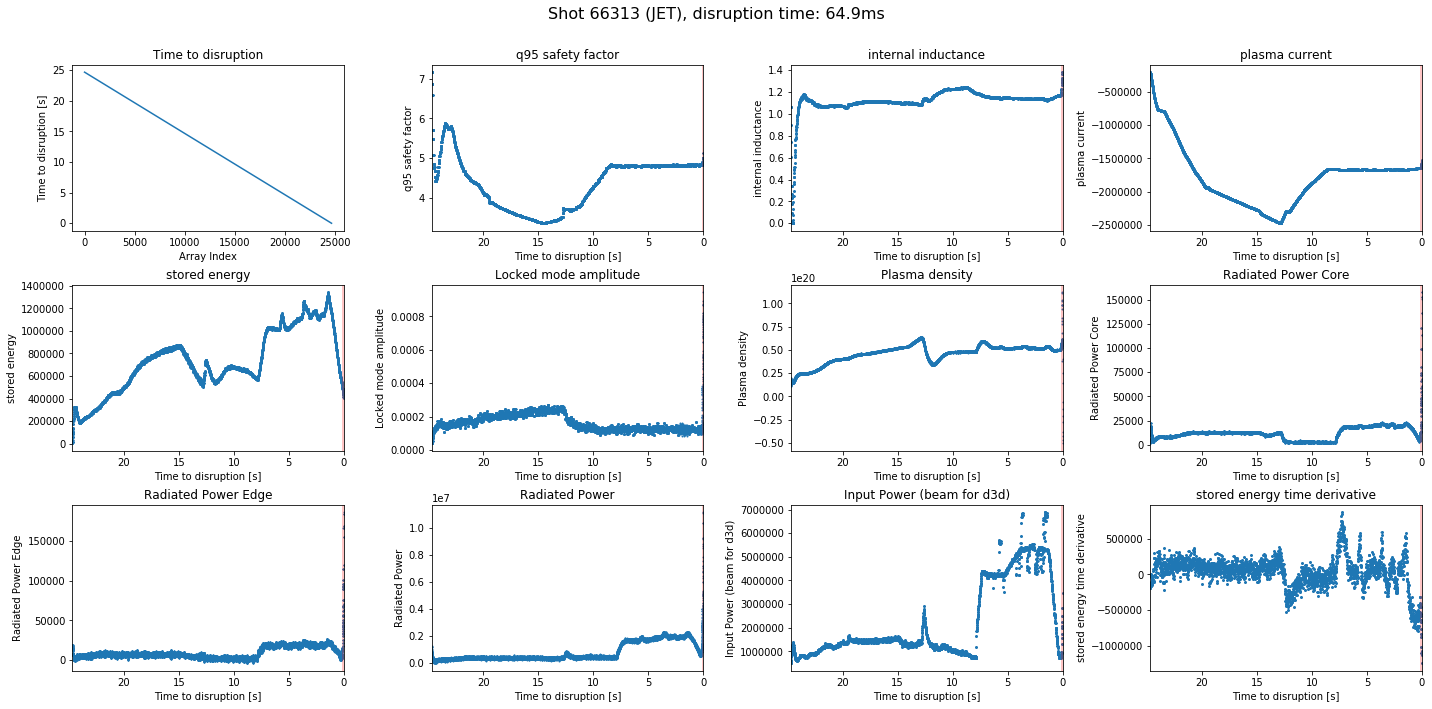

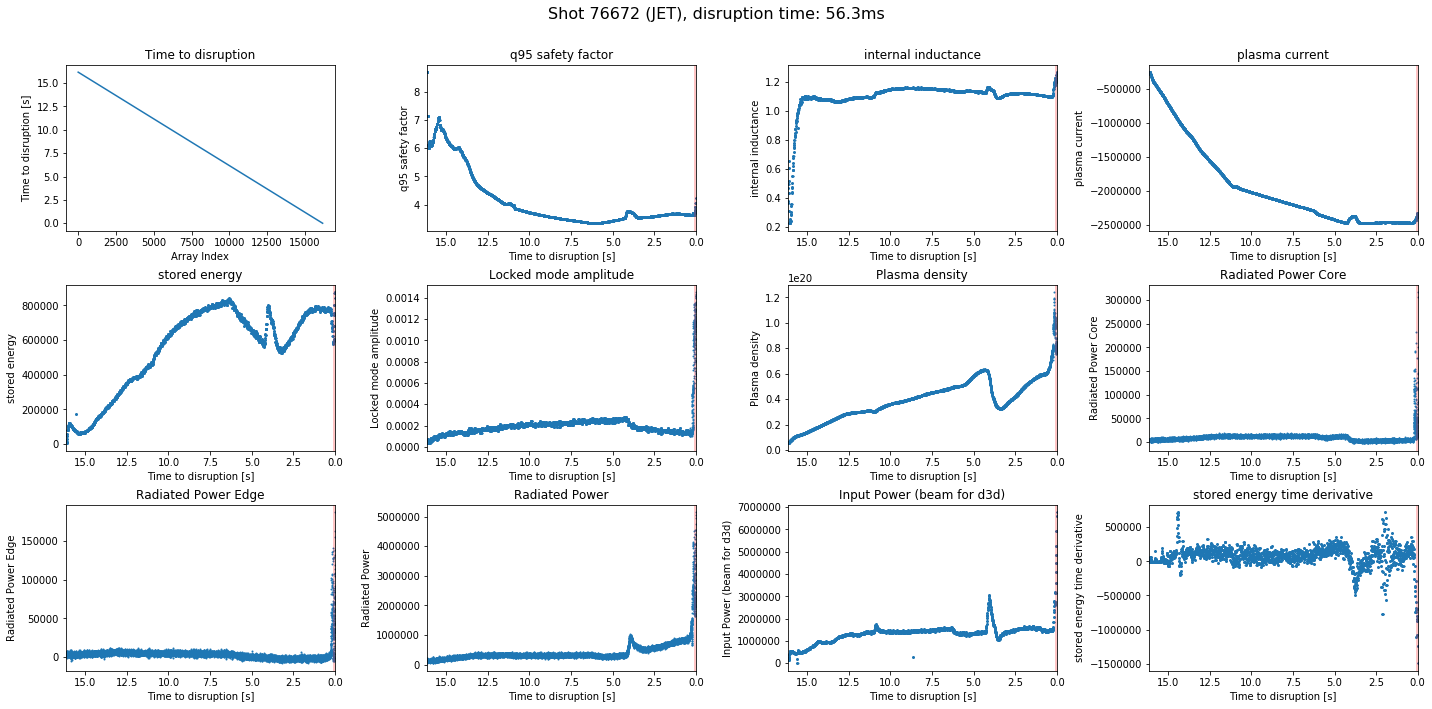

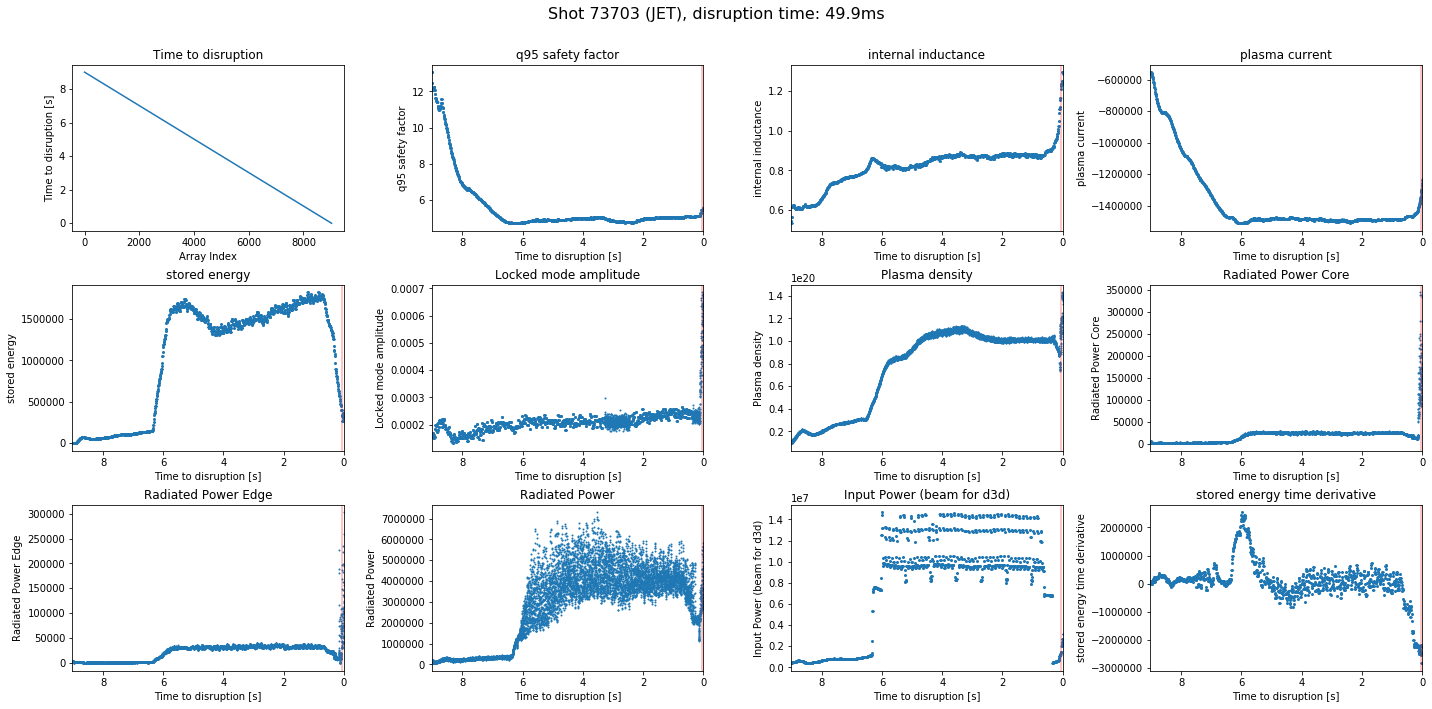

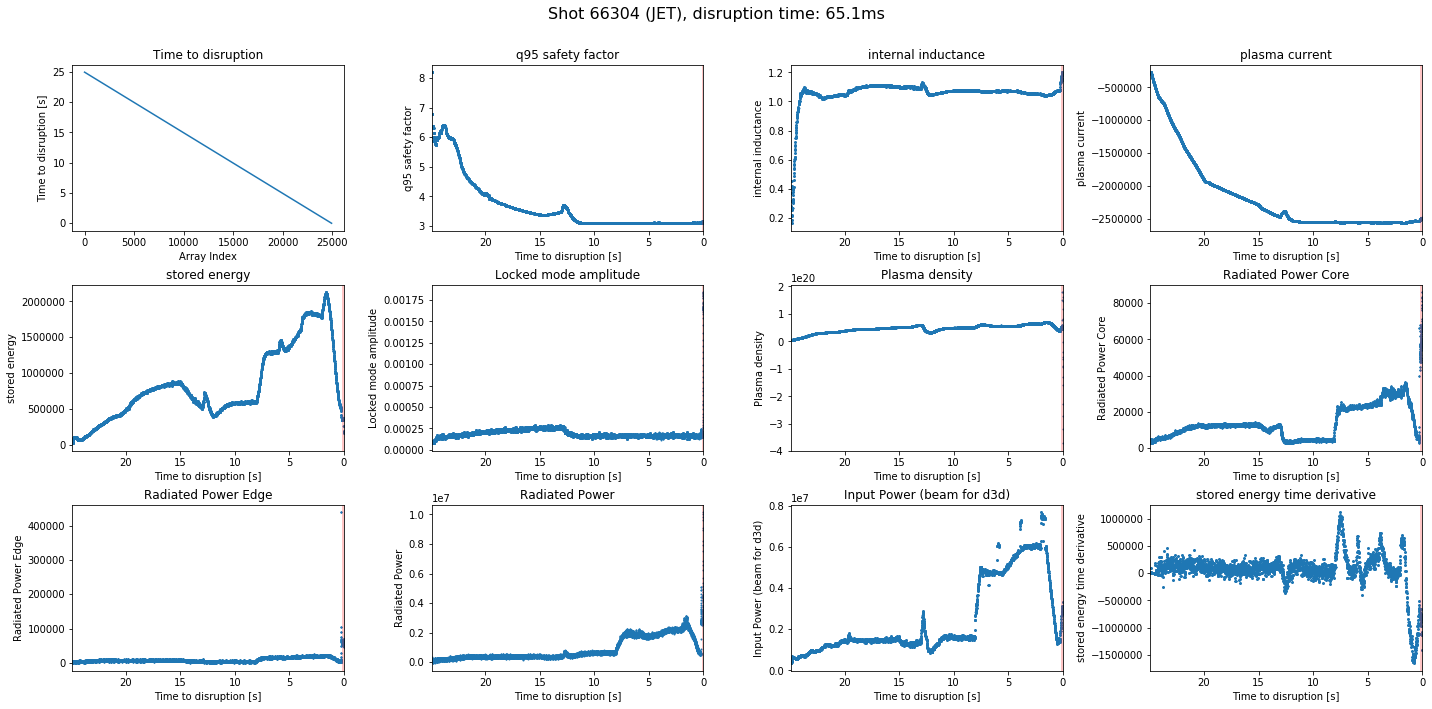

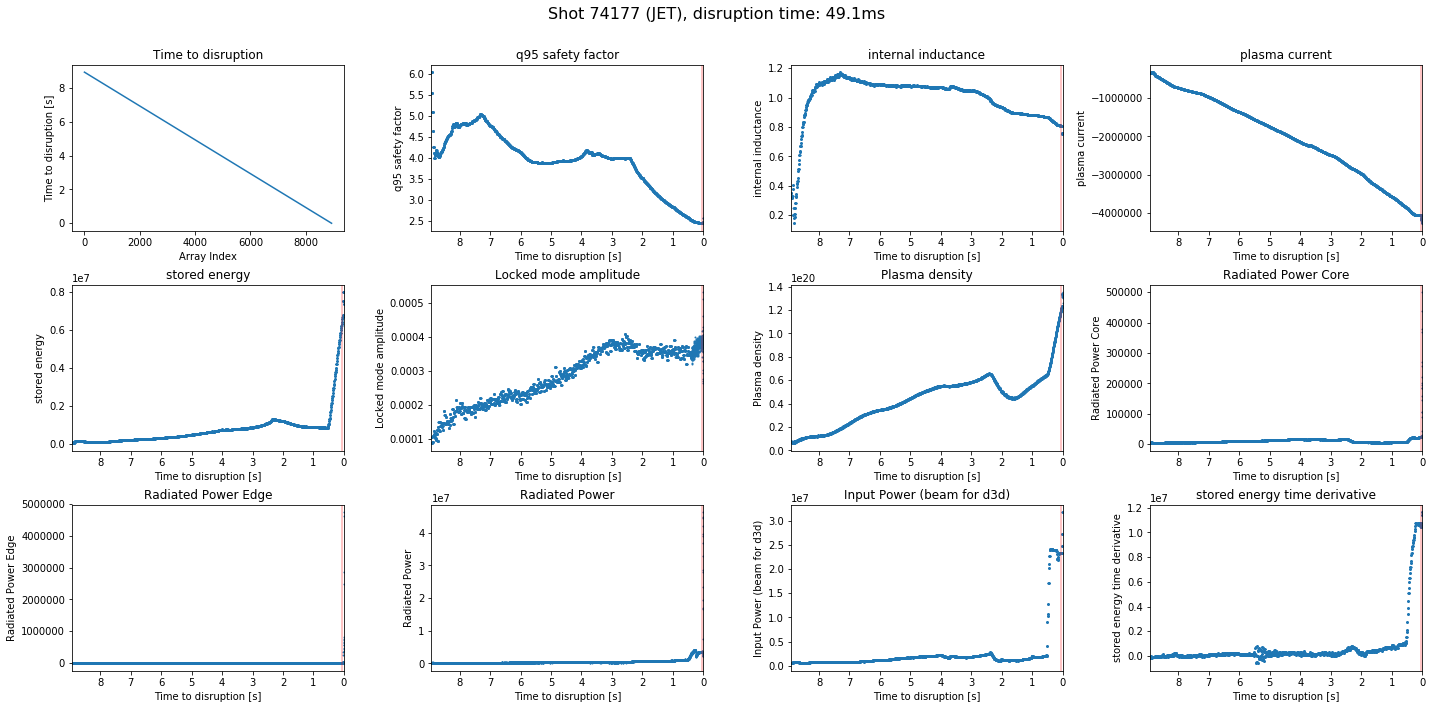

In [19]:
for shot, file in zip(disruptive_shots, disruptive_files):
    plot_shot(shot,file)

In [ ]:
for shot, file in zip(non_disruptive_shots, non_disruptive_files):
    plot_shot(shot,file)

### Done!
Sandbox...